# CHAPTER 11
# Time Series
- Time series data is an important form of structured data in many different fields, such as finance, economics, ecology, neuroscience, and physics. 
- Anything that is observed or measured at many points in time forms a **time series**. 
- Many time series are **fixed frequency**, which is to say that data points occur at **regular intervals** according to some rule, such as every 15 seconds, every 5 minutes, or once per month. 
- Time series can also be **irregular** without a fixed unit of time or offset between units.
- **pandas** provides many built-in time series tools and data algorithms. 
- You can efficiently work with very large time series and easily slice and dice, aggregate, and resample irregular- and fixed-frequency time series.

## Date and Time Data Types and Tools
- The Python standard library includes data types for date and time data, as well as calendar-related functionality. 
- The **datetime**, **time**, and **calendar** modules are the main places to start. 
- The **datetime.datetime** type, or simply datetime, is widely used.
- **datetime** stores both the date and time down to the microsecond. 
- **timedelta** represents the temporal difference between two datetime objects.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse

In [4]:
# Get timestamp for now
now = datetime.now()
print(now)

2021-03-10 17:59:52.542611


In [5]:
# Get the year, month & day for now timestamp
now.year, now.month, now.day

(2021, 3, 10)

In [7]:
# Timedelta between 2 datetime objects
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

# Check the delta in days
delta.days

926

In [8]:
# Define a start date
start = datetime(2011, 1, 7)

# Add a timedelta to a datetime object
start + timedelta(days=12)

# timedelta?

datetime.datetime(2011, 1, 19, 0, 0)

**TABLE**: Types in datetime module

| Type                  | Description |
| :---                  |    :----    |
|date| Store calendar date (year, month, day) using the Gregorian calendar
|time| Store time of day as hours, minutes, seconds, and microseconds
|datetime| Stores both date and time
|timedelta| Represents the difference between two datetime values (as days, seconds, and microseconds)
|tzinfo| Base type for storing time zone information

### Converting Between String and Datetime
- You can format **datetime objects** and **pandas Timestamp** objects as strings using **str** or the **strftime** method, passing a format specification.
- You can use these same format codes to convert strings to dates using date **time.strptime**.
- **datetime.strptime** is a good way to parse a date with a known format. 
- However, it can be a bit annoying to have to write a format spec each time, especially for common date formats. In this case, you can use the **parser.parse** method in the third-party **dateutil package** (this is installed automatically when you install pandas).
- **dateutil** is capable of parsing most human-intelligible date representations. In international locales, day appearing before month is very common, so you can pass **dayfirst=True** to indicate this.

In [9]:
# Create a datetime object
stamp = datetime(2011, 1, 3)

# Convert to string
str(stamp)

'2011-01-03 00:00:00'

In [10]:
# Convert to string with some formatting
stamp.strftime('%Y-%m-%d')

'2011-01-03'

**TABLE**: Datetime format specification (ISO C89 compatible)

| Type                  | Description |
| :---                  |    :----    |
|%Y| Four-digit year
|%y| Two-digit year
|%m| Two-digit month [01, 12]
|%d| Two-digit day [01, 31]
|%H| Hour (24-hour clock) [00, 23]
|%I| Hour (12-hour clock) [01, 12]
|%M| Two-digit minute [00, 59]
|%S| Second [00, 61] (seconds 60, 61 account for leap seconds)
|%w| Weekday as integer [0 (Sunday), 6]
|%U| Week number of the year [00, 53]; Sunday is considered the first day of the week, and days before the first Sunday of the year are “week 0”
|%W| Week number of the year [00, 53]; Monday is considered the first day of the week, and days before the first Monday of the year are “week 0”
|%z| UTC time zone offset as +HHMM or -HHMM; empty if time zone naive
|%F| Shortcut for %Y-%m-%d (e.g., 2012-4-18)
|%D| Shortcut for %m/%d/%y (e.g., 04/18/12)

In [11]:
# Create a string
value = '2011-01-03'

# Convert string to datetime object
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [12]:
# Use parse method to convert string to datetime
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [13]:
# Use parse method to convert string to datetime
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [14]:
# Use parse method to convert string to datetime where day is first
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

- **pandas** is generally oriented toward working with **arrays of dates**, whether used as an axis **index** or a **column** in a DataFrame. 
- The **to_datetime method** parses many different kinds of date representations. 
- Standard date formats like ISO 8601 can be parsed very quickly.
- It also handles values that should be considered **missing** (None, empty string, etc.).
- **NaT (Not a Time)** is pandas’s null value for timestamp data.

In [15]:
# List of strings
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

# Parse strings to DatetimeIndex
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [16]:
# Add missing data
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

**TABLE**: Locale-specific date formatting

| Type                  | Description |
| :---                  |    :----    |
|%a| Abbreviated weekday name
|%A| Full weekday name
|%b| Abbreviated month name
|%B| Full month name
|%c| Full date and time (e.g., ‘Tue 01 May 2012 04:20:57 PM’)
|%p| Locale equivalent of AM or PM
|%x| Locale-appropriate formatted date (e.g., in the United States, May 1, 2012 yields ’05/01/2012’)
|%X| Locale-appropriate time (e.g., ’04:24:12 PM’)

## Time Series Basics
- A basic kind of **time series** object in pandas is a Series indexed by timestamps, which is often represented external to pandas as Python strings or datetime objects.

In [17]:
# Create a list of dates
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8), 
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

# Create a Series with dates a index
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.316251
2011-01-05   -1.175562
2011-01-07    1.487599
2011-01-08   -0.577672
2011-01-10   -0.417332
2011-01-12    0.148312
dtype: float64

In [18]:
# The datetime objects have been put in a DatetimeIndex
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [20]:
ts[::2]

2011-01-02    0.316251
2011-01-07    1.487599
2011-01-10   -0.417332
dtype: float64

In [19]:
# Arithmetic operations between differently indexed time series 
# automatically align on the dates
ts + ts[::2]

2011-01-02    0.632501
2011-01-05         NaN
2011-01-07    2.975199
2011-01-08         NaN
2011-01-10   -0.834664
2011-01-12         NaN
dtype: float64

- **pandas** stores timestamps using NumPy’s **datetime64** data type at the nanosecond resolution.
- Scalar values from a **DatetimeIndex** are pandas Timestamp objects.
- A **Timestamp** can be substituted anywhere you would use a **datetime** object. 
- Additionally, it can store frequency information (if any) and understands how to do time zone conversions and other kinds of manipulations.

In [21]:
# Check first element in the Series index
ts.index[0]

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting
- **Time series** behaves like any other **pandas.Series** when you are indexing and selecting data based on label.

In [22]:
# You can also pass a string that is interpretable as a date
ts['2011-01-10']

-0.41733217184983634

In [23]:
# Create longer time series
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    0.199497
2000-01-02    1.466068
2000-01-03   -0.517510
2000-01-04   -0.107146
2000-01-05    0.183423
                ...   
2002-09-22    0.206915
2002-09-23   -0.592539
2002-09-24   -0.719937
2002-09-25   -2.080647
2002-09-26   -0.336263
Freq: D, Length: 1000, dtype: float64

In [24]:
# For long time series a year/ a year and month can be passed to easily select
# slices of data

longer_ts['2001']

2001-01-01    0.670695
2001-01-02    0.181440
2001-01-03    0.804703
2001-01-04   -0.632145
2001-01-05    0.435604
                ...   
2001-12-27   -1.730529
2001-12-28    0.010479
2001-12-29   -0.967225
2001-12-30   -1.815692
2001-12-31   -0.042385
Freq: D, Length: 365, dtype: float64

In [25]:
# Slicing with datetime objects works as well
ts[datetime(2011, 1, 7):]

2011-01-07    1.487599
2011-01-08   -0.577672
2011-01-10   -0.417332
2011-01-12    0.148312
dtype: float64

- Because most time series data is ordered **chronologically**, you can slice with timestamps not contained in a time series to perform a range query.
- As before, you can pass either a string date, datetime, or timestamp. 
- **Remember** that slicing in this manner produces views on the source time series like slicing NumPy arrays. This means that no data is copied and modifications on the slice will be reflected in the original data.
- There is an equivalent instance method, **truncate**, that slices a Series between two dates.

In [26]:
# Example time series
ts

2011-01-02    0.316251
2011-01-05   -1.175562
2011-01-07    1.487599
2011-01-08   -0.577672
2011-01-10   -0.417332
2011-01-12    0.148312
dtype: float64

In [27]:
# Slice using dates that are NOT contained in teh index
ts['1/6/2011':'1/11/2011']

2011-01-07    1.487599
2011-01-08   -0.577672
2011-01-10   -0.417332
dtype: float64

In [28]:
# Use truncate method to slice a time series
ts.truncate(after='1/9/2011')

2011-01-02    0.316251
2011-01-05   -1.175562
2011-01-07    1.487599
2011-01-08   -0.577672
dtype: float64

In [29]:
# Same applies for DataFrames as well
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4), index=dates, 
                       columns=['Colorado', 'Texas','New York', 'Ohio'])

long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.488285,-0.064416,1.348638,-1.032363
2001-05-09,0.431879,-1.256545,0.071830,0.768037
2001-05-16,-2.127455,-0.454711,-0.235301,-0.098507
2001-05-23,1.435495,-1.142145,0.311294,0.000954
2001-05-30,-0.031143,-1.332736,1.309136,0.298314


### Time Series with Duplicate Indices
- In some applications, there may be multiple data observations falling on a particular timestamp.
- We can tell that the **index** is not unique by checking its **is_unique** property.
- Indexing into this type of time series will now either produce **scalar values** or **slices** depending on whether a timestamp is duplicated.

In [30]:
# Example time series with duplicated dates
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [31]:
# Check if the index is unique
dup_ts.index.is_unique

False

In [32]:
# Indexing with unique dates will result in a scalar
dup_ts['1/3/2000']

4

In [33]:
# Indexing with for rows with duplicate dates will result into a slice
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [34]:
# Aggregate the data having non-unique timestamps
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

## Date Ranges, Frequencies, and Shifting
- Generic time series in pandas are assumed to be **irregular** = they have no fixed frequency. 
- It’s often desirable to work relative to a fixed frequency, such as daily, monthly, or every 15 minutes, even if that means introducing missing values into a time series. 
- **pandas** has a full suite of standard time series frequencies and tools for resampling, inferring frequencies, and generating fixed-frequency date ranges. 
- You can convert the sample time series to be fixed daily frequency by calling **resample**.

In [35]:
# Example time series
ts

2011-01-02    0.316251
2011-01-05   -1.175562
2011-01-07    1.487599
2011-01-08   -0.577672
2011-01-10   -0.417332
2011-01-12    0.148312
dtype: float64

In [36]:
# Convert the sample time series to be fixed daily frequency by calling resample
resampler = ts.resample('D')
resampler

### Generating Date Ranges
- **pandas.date_range** is responsible for generating a **DatetimeIndex** with an indicated length according to a particular frequency.
- By default, **date_range** generates **daily** timestamps. 
- If you pass only a start or end date, you must pass a **number of periods** to generate.

In [37]:
# Create a DatetimeIndex
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [38]:
# Create a DatetimeIndex
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [39]:
# Create a date index containing the last business day of each month
pd.date_range('2021-01-01', '2021-12-01', freq='BM')

DatetimeIndex(['2021-01-29', '2021-02-26', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-30', '2021-08-31',
               '2021-09-30', '2021-10-29', '2021-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [40]:
# date_range by default preserves the time of the start or end timestamp
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [41]:
# Generate a set of timestamps normalized to midnight
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

**TABLE**: Base time series frequencies (not comprehensive)

| Alias                  | Offset type |    Description |
| :---                   |    :----    |       :----    |
|D| Day| Calendar daily
|B| BusinessDay| Business daily
|H| Hour| Hourly
|T or min| Minute| Minutely
|S| Second| Secondly
|L or ms| Milli| Millisecond (1/1,000 of 1 second)
|U| Micro| Microsecond (1/1,000,000 of 1 second)
|M| MonthEnd| Last calendar day of month
|BM| BusinessMonthEnd| Last business day (weekday) of month
|MS| MonthBegin| First calendar day of month
|BMS| BusinessMonthBegin| First weekday of month
|W-MON, W-TUE, ...| Week| Weekly on given day of week (MON, TUE, WED, THU, FRI, SAT, or SUN)
|WOM-1MON, WOM-2MON, ...| WeekOfMonth| Generate weekly dates in the first, second, third, or fourth week of the month (e.g., WOM-3FRI for the third Friday of each month)
|Q-JAN, Q-FEB, ...| QuarterEnd| Quarterly dates anchored on last calendar day of each month, for year ending in indicated month (JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC)
|BQ-JAN, BQ-FEB, ...| BusinessQuarterEnd| Quarterly dates anchored on last weekday day of each month, for year ending in indicated month
|QS-JAN, QS-FEB, ...| QuarterBegin| Quarterly dates anchored on first calendar day of each month, for year ending in indicated month
|BQS-JAN, BQS-FEB, ...| BusinessQuarterBegin| Quarterly dates anchored on first weekday day of each month, for year ending in indicated month
|A-JAN, A-FEB, ...| YearEnd| Annual dates anchored on last calendar day of given month (JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC)
|BA-JAN, BA-FEB, ...| BusinessYearEnd| Annual dates anchored on last weekday of given  month
|AS-JAN, AS-FEB, ...| YearBegin| Annual dates anchored on first day of given month
|BAS-JAN, BAS-FEB, ...| BusinessYearBegin| Annual dates anchored on first weekday of given month

### Frequencies and Date Offsets
- **Frequencies** in pandas are composed of a base frequency and a multiplier. 
- Base frequencies are typically referred to by a string alias, like **'M'** for monthly or **'H'** for hourly. 
- For each base frequency, there is an object defined generally referred to as a date offset.
- Some frequencies describe points in time that are not evenly spaced. 
- For example, 'M' (calendar month end) and 'BM' (last business/weekday of month) depend on the number of days in a month and, in the latter case, whether the month ends on a weekend or not. We refer to these as **anchored offsets**.

In [42]:
# Create timeseries with dataoffset of 4 hours
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [43]:
# You can pass frequency strings like '1h30min'
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates
- One useful frequency class is “week of month,” starting with **WOM**. 
- This enables you to get dates like the third Friday of each month.

In [44]:
# Dates for third Friday of each month
rng = pd.date_range('2020-01-01', '2020-12-31', freq='WOM-3FRI')
list(rng)

[Timestamp('2020-01-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-02-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-03-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-04-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-05-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-06-19 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-07-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-08-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-09-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-10-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-11-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2020-12-18 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading and Lagging) Data
- **“Shifting”** refers to moving data **backward** and **forward** through time. 
- Both Series and DataFrame have a shift method for doing naive shifts forward or backward, leaving the index unmodified.

In [45]:
# Example timeseries
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    0.162612
2000-02-29   -0.558856
2000-03-31   -0.230815
2000-04-30   -0.744331
Freq: M, dtype: float64

In [46]:
# Shift data 2 rows forward - introducing 2 NaN rows at the beginning
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.162612
2000-04-30   -0.558856
Freq: M, dtype: float64

- A common use of shift is computing **percent changes** in a time series or multiple time series as DataFrame columns. This is expressed as:
        ts / ts.shift(1) - 1
- Because naive shifts leave the index unmodified, some data is discarded. 
- Thus if the **frequency** is known, it can be passed to **shift** to advance the timestamps instead of simply the data.

In [47]:
# USe shift to advance timestamps
ts.shift(2, freq='M')

2000-03-31    0.162612
2000-04-30   -0.558856
2000-05-31   -0.230815
2000-06-30   -0.744331
Freq: M, dtype: float64

## Time Zone Handling
- **Coordinated universal time or UTC** is the current international standard. 
- Time zones are expressed as offsets from UTC. 
- For example, New York is four hours behind UTC during daylight saving time and five hours behind the rest of the year.
- In Python, time zone information comes from the third-party **pytz library**, which exposes the Olson database, a compilation of world time zone information.
- Localizing naive timestamps also checks for ambiguous or non-existent times around daylight saving time transitions.

In [48]:
# Common timezones
import pytz

pytz.common_timezones[:5]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara']

In [49]:
# To get a time zone object from pytz, use pytz.timezone
tz = pytz.timezone('America/New_York')
tz

# Methods in pandas will accept either time zone names or these objects

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion
- By default, time series in pandas are **time zone naive** (no timezone defined).
- Conversion from naive to localized is handled by the **tz_localize** method.
- Once a time series has been localized to a particular time zone, it can be converted to another time zone with **tz_convert**.
- **tz_localize** and **tz_convert** are also instance methods on DatetimeIndex.

In [50]:
# Example timeseries
ts

2000-01-31    0.162612
2000-02-29   -0.558856
2000-03-31   -0.230815
2000-04-30   -0.744331
Freq: M, dtype: float64

In [51]:
# The index’s tz field is None
print(ts.index.tz)

None


In [52]:
# Date ranges can be generated with a time zone set
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [53]:
# Convert from naive to localized
ts_utc = ts.tz_localize('UTC')
ts_utc

2000-01-31 00:00:00+00:00    0.162612
2000-02-29 00:00:00+00:00   -0.558856
2000-03-31 00:00:00+00:00   -0.230815
2000-04-30 00:00:00+00:00   -0.744331
Freq: M, dtype: float64

In [54]:
# Convert from UTC to another timezone
ts_utc.tz_convert('America/New_York')

2000-01-30 19:00:00-05:00    0.162612
2000-02-28 19:00:00-05:00   -0.558856
2000-03-30 19:00:00-05:00   -0.230815
2000-04-29 20:00:00-04:00   -0.744331
Freq: M, dtype: float64

### Operations with Time Zone−Aware Timestamp Objects
- Similar to time series and date ranges, individual Timestamp objects similarly can be localized from naive to time zone–aware and converted from one time zone to another.
- Time zone–aware Timestamp objects internally store a UTC timestamp value as nanoseconds since the Unix epoch (January 1, 1970); this UTC value is invariant between time zone conversions.
- When performing time arithmetic using pandas’s DateOffset objects, pandas respects daylight saving time transitions where possible.

In [55]:
# Create naive timestamp
stamp = pd.Timestamp('2011-03-12 04:00')
stamp

Timestamp('2011-03-12 04:00:00')

In [56]:
# Timestamp localized from naive to timezone aware
stamp_utc = stamp.tz_localize('utc')
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [57]:
# Convert to another timezone
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [58]:
# You can also pass a time zone when creating the Timestamp
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [59]:
# Nanoseconds since the Unix epoch (January 1, 1970)
stamp_utc.value

1299902400000000000

### Operations Between Different Time Zones
- If two time series with different time zones are combined, the result will be **UTC**.
- Since the timestamps are stored under the hood in UTC, this is a straightforward operation and requires no conversion to happen.

In [60]:
# Example timeseries
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -0.829683
2012-03-08 09:30:00    3.071373
2012-03-09 09:30:00   -0.746762
2012-03-12 09:30:00    0.462006
2012-03-13 09:30:00   -1.024568
2012-03-14 09:30:00    0.849683
2012-03-15 09:30:00   -1.202686
2012-03-16 09:30:00    0.747057
2012-03-19 09:30:00   -0.594617
2012-03-20 09:30:00   -1.460926
Freq: B, dtype: float64

In [61]:
# Create 2 timeseries with different timezones
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [62]:
# Sum of 2 timesiries with diffrent tz
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## Periods and Period Arithmetic
- **Periods** represent **timespans**, like days, months, quarters, or years. 
- The **Period class** represents this data type, requiring a string or integer and a frequency (TABLE: Base time series frequencies).

In [63]:
# Define a Period object
p = pd.Period(2007, freq='A-DEC')
p

# The Period object represents the full timespan from January 1, 2007, to
# December 31, 2007, inclusive.

Period('2007', 'A-DEC')

In [64]:
# Adding and subtracting integers from periods has the effect of shifting by their frequency
p + 5

Period('2012', 'A-DEC')

In [65]:
# If two periods have the same frequency, their difference is the number of units
# between them
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [66]:
# Regular ranges of periods can be constructed with the period_range function
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [67]:
# The PeriodIndex class stores a sequence of periods and can serve as an axis index in
# any pandas data structure
pd.Series(np.random.randn(6), index=rng)

2000-01   -1.029425
2000-02   -0.269905
2000-03    0.693549
2000-04    1.880703
2000-05   -0.742301
2000-06   -0.441203
Freq: M, dtype: float64

### Period Frequency Conversion
- Periods and PeriodIndex objects can be converted to another frequency with their **asfreq method**.

In [68]:
# Annual period defined above
p

Period('2007', 'A-DEC')

In [69]:
# Convert to monthly period
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [70]:
# Whole PeriodIndex objects or time series can be similarly converted 
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.681626
2007    1.418011
2008    0.500207
2009    0.809783
Freq: A-DEC, dtype: float64

In [71]:
# Convert to monthly period
ts.asfreq('M', how='start')

# Annual periods are replaced with monthly periods corresponding to the first
# month falling within each annual period

2006-01    0.681626
2007-01    1.418011
2008-01    0.500207
2009-01    0.809783
Freq: M, dtype: float64

### Quarterly Period Frequencies
- Quarterly data is standard in accounting, finance, and other fields. 
- Much quarterly data is reported relative to a **fiscal year end**, typically the last calendar or business day of one of the 12 months of the year. 
- Thus, the **period 2012Q4** has a different meaning depending on fiscal year end. 
- **pandas** supports all 12 possible quarterly frequencies as **Q-JAN** through **Q-DEC**.

In [72]:
# Example period
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [73]:
# Convert to daily frequency
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [74]:
# Convert to daily frequency
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [75]:
# You can generate quarterly ranges using period_range
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

### Converting Timestamps to Periods (and Back)
- Series and DataFrame objects indexed by timestamps can be converted to periods with the **to_period method**.
- Since periods refer to non-overlapping timespans, a timestamp can only belong to a single period for a given frequency. 
- While the frequency of the new PeriodIndex is inferred from the timestamps by default, you can specify any frequency you want.
- There is also no problem with having duplicate periods in the result.
- To convert back to timestamps, use **to_timestamp**.

In [76]:
# Example timeseries
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    2.528773
2000-02-29   -0.981052
2000-03-31   -0.594046
Freq: M, dtype: float64

In [77]:
# Convert to periods
pts = ts.to_period()
pts

2000-01    2.528773
2000-02   -0.981052
2000-03   -0.594046
Freq: M, dtype: float64

In [78]:
# Example timeseries
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    0.395758
2000-01-30   -1.256607
2000-01-31    0.975175
2000-02-01    0.192706
2000-02-02   -0.242780
2000-02-03   -0.061984
Freq: D, dtype: float64

In [79]:
# Convert to_period
ts2.to_period('M')

2000-01    0.395758
2000-01   -1.256607
2000-01    0.975175
2000-02    0.192706
2000-02   -0.242780
2000-02   -0.061984
Freq: M, dtype: float64

### Creating a PeriodIndex from Arrays
- Fixed frequency datasets are sometimes stored with timespan information spread across multiple columns.

In [80]:
# Example dataset
data = pd.read_csv('examples/macrodata.csv')
data.head(5)

# The year and quarter are in different columns

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [81]:
# By passing these arrays to PeriodIndex with a frequency, you can combine them to
# form an index for the DataFrame
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [82]:
# Set the DataFrame's index
data.index = index
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## Resampling and Frequency Conversion
- **Resampling** refers to the process of converting a time series from one frequency to another. 
- Aggregating higher frequency data to lower frequency is called **downsampling**, while converting lower frequency to higher frequency is called **upsampling**. 
- Not all resampling falls into either of these categories; for example, converting W-WED (weekly on Wednesday) to W-FRI is neither upsampling nor downsampling.
- **pandas** objects are equipped with a **resample method**, which is the workhorse function for all frequency conversion. 
- **resample** has a similar API to groupby; you call resample to group the data, then call an aggregation function.
- **resample** is a flexible and high-performance method that can be used to process very large time series.

In [83]:
# Example timeseries
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -1.945322
2000-01-02    0.324216
2000-01-03    0.650842
2000-01-04    1.689104
2000-01-05    1.309030
                ...   
2000-04-05    1.646983
2000-04-06    0.187008
2000-04-07    0.151629
2000-04-08    0.477474
2000-04-09   -1.172666
Freq: D, Length: 100, dtype: float64

In [84]:
# Resample to monthly & aggregate as mean
ts.resample('M').mean()

2000-01-31    0.295548
2000-02-29   -0.147842
2000-03-31    0.197198
2000-04-30   -0.168672
Freq: M, dtype: float64

In [85]:
# Resample as a period
ts.resample('M', kind='period').mean()

2000-01    0.295548
2000-02   -0.147842
2000-03    0.197198
2000-04   -0.168672
Freq: M, dtype: float64

**TABLE**: Resample method arguments

| Argument                  | Description |
| :---                  |    :----    |
|freq| String or DateOffset indicating desired resampled frequency (e.g., ‘M', ’5min', or Second(15))
|axis| Axis to resample on; default axis=0
|fill_method| How to interpolate when upsampling, as in 'ffill' or 'bfill'; by default does no interpolation
|closed| In downsampling, which end of each interval is closed (inclusive), 'right' or 'left'
|label| In downsampling, how to label the aggregated result, with the 'right' or 'left' bin edge (e.g., the 9:30 to 9:35 five-minute interval could be labeled 9:30 or 9:35)
|loffset| Time adjustment to the bin labels, such as '-1s' / Second(-1) to shift the aggregate labels one second earlier limit When forward or backward filling, the maximum number of periods to fill
|kind| Aggregate to periods ('period') or timestamps ('timestamp'); defaults to the type of index the time series has 
|convention| When resampling periods, the convention ('start' or 'end') for converting the low-frequency period to high frequency; defaults to 'end'

### Downsampling
- Aggregating data to a regular, lower frequency is a pretty normal time series task. 
- The data you’re aggregating doesn’t need to be fixed frequently; the desired frequency defines **bin edges** that are used to slice the time series into pieces to aggregate. 
- For example, to convert to monthly, 'M' or 'BM', you need to chop up the data into one-month intervals. Each interval is said to be half-open; a data point can only belong to one interval, and the union of the intervals must make up the whole time frame.
- There are a couple things to think about when using resample to **downsample** data:
    - Which side of each interval is closed
    - How to label each aggregated bin, either with the start of the interval or the end

In [86]:
# One-minute data
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [88]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [87]:
# Aggregate this data into five-minute chunks by taking the sum
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

- The **frequency** you pass defines bin edges in five-minute increments. 
- By default, the **left bin edge is inclusive**, so the 00:00 value is included in the 00:00 to 00:05 interval.
- Passing **closed='right'** changes the interval to be closed on the right.
- The resulting time series is labeled by the timestamps from the left side of each bin.
- By passing **label='right'** you can label them with the right bin edge.
- Lastly, you might want to shift the result index by some amount, say subtracting one second from the right edge to make it more clear which interval the timestamp refers to. To do this, pass a string or date offset to **loffset**.

In [ ]:
# Resample to 5-min interval
ts.resample('5min', closed='right', label='right').sum()

#### Open-High-Low-Close (OHLC) resampling
- In finance, a popular way to aggregate a time series is to compute four values for each bucket: the first (open), last (close), maximum (high), and minimal (low) values. 
- By using the **ohlc aggregate function** you will obtain a DataFrame having columns containing these four aggregates in one line of code.

In [89]:
# Use the ohlc aggregate function
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation
- When converting from a low frequency to a higher frequency, no aggregation is needed.
- We use the **asfreq method** to convert to the higher frequency without any aggregation.

In [90]:
# Example timeseries
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,1.156998,1.123107,-0.578008,0.592471
2000-01-12,0.765288,-0.213532,-0.692070,-0.830481


In [91]:
# Resmaple to daily data
df_daily = frame.resample('D').asfreq()
df_daily

# In this case there is only one value per group, and missing values result in the gaps

,Colorado,Texas,New York,Ohio
2000-01-05,1.156998,1.123107,-0.578008,0.592471
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.765288,-0.213532,-0.692070,-0.830481


In [92]:
# Resample and forwrd fill
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,1.156998,1.123107,-0.578008,0.592471
2000-01-06,1.156998,1.123107,-0.578008,0.592471
2000-01-07,1.156998,1.123107,-0.578008,0.592471
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.765288,-0.213532,-0.692070,-0.830481


## Moving Window Functions
- An important class of array transformations used for time series operations are **statistics** and other functions evaluated over a **sliding window** or with exponentially decaying weights. 
- This can be useful for smoothing noisy or gappy data. I call these **moving window functions**, even though it includes functions without a fixed-length window like exponentially weighted moving average. 
- Like other statistical functions, these also automatically exclude **missing data**.

In [93]:
# Load up some time series data and resample it to business day frequency
close_px_all = pd.read_csv('examples/stock_px_2.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


**ROLLING OPERATOR**:
- The **rolling operator**, which behaves similarly to resample and groupby can be called on a Series or DataFrame along with a window (expressed as a number of periods).
- The expression **rolling(250)** is similar in behavior to groupby, but instead of grouping it creates an object that enables grouping over a 250-day sliding window. 
- So here we have the **250-day moving window average** of Apple’s stock price.
- By default rolling functions require all of the values in the window to be non-NA.
- This behavior can be changed to account for missing data and, in particular, the fact that you will have fewer than window periods of data at the beginning of the time.
- The rolling function also accepts a **string** indicating a **fixed-size time offset** rather than a set number of periods. Using this notation can be useful for irregular time series. These are the same strings that you can pass to resample.

<AxesSubplot:>

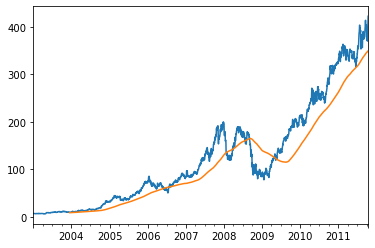

In [94]:
# Lineplot for AAPL index
close_px.AAPL.plot()

# Add the 250-day moving window average on the same graph
close_px.AAPL.rolling(250).mean().plot()

In [95]:
# Rolling window
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot:>

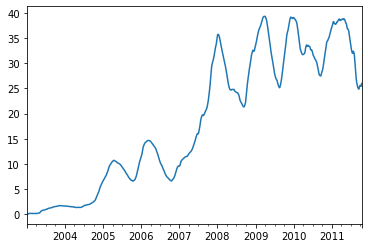

In [96]:
# Plot for apple moving standard deviation
appl_std250.plot()

<AxesSubplot:>

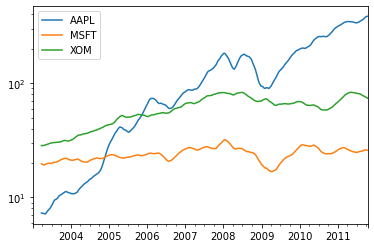

In [97]:
# Calling a moving window function on a DataFrame applies the transformation to
# each column 
close_px.rolling(60).mean().plot(logy=True)

In [98]:
# Compute a 20-day rolling mean
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions
- An alternative to using a **static window size** with **equally weighted** observations is to specify a **constant decay factor** to give more weight to more recent observations.
- There are a couple of ways to specify the decay factor. You can use a **span**, which makes the result comparable to a simple moving window function with window size equal to the span.
- Since an exponentially weighted statistic places more weight on more recent observations, it “adapts” faster to changes compared with the equal-weighted version.
- **pandas** has the **ewm** operator to go along with **rolling** and **expanding**.

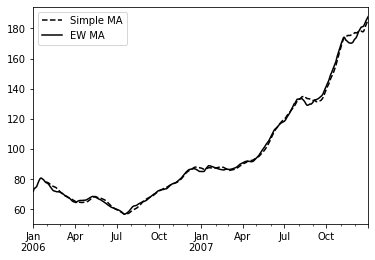

In [99]:
# Example comparing a 60-day moving average of Apple’s stock price with 
# an EW moving average with span=60
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()

ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### Binary Moving Window Functions
- Some statistical operators, like **correlation and covariance**, need to operate on two time series. 
- As an example, financial analysts are often interested in a stock’s correlation to a benchmark index like the S&P 500.

In [100]:
# Compute the percent change for all of our time series of interest
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

<AxesSubplot:>

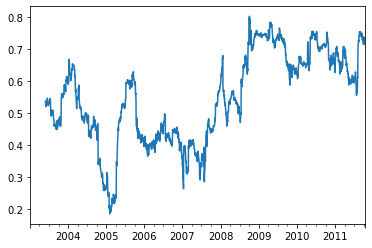

In [101]:
# The corr aggregation function after we call rolling can then compute the rolling
# correlation with spx_rets 
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [ ]:
# rolling_corr will compute the correlation of the Series (spx_rets, in this case) 
# with each column in the DataFrame 
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions
- The **apply method** on **rolling** and related methods provides a means to apply an array function of your own devising over a moving window. 
- The only requirement is that the function produce a single value (a reduction) from each piece of the array.
- For example, we might be interested in the **percentile rank** of a particular value over the
sample. The **scipy.stats.percentileofscore** function does just this.

<AxesSubplot:>

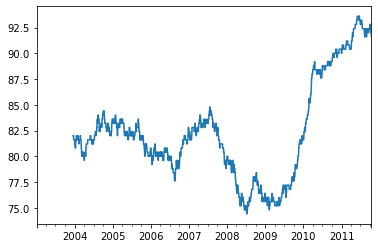

In [102]:
# Import percentileofscore from scipy
from scipy.stats import percentileofscore

# Calculate the percentile rank
score_at_2percent = lambda x: percentileofscore(x, 0.02)

# Plot the results
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()